In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

%matplotlib inline

## Ejercicio 1
 Escriba una función en Python que toma arreglos $X$ e $Y$ de los valores dados, y un valor $x$ obtiene el valor interpolado correspondiente $y = f(x)$.

### Lagrange

In [2]:
def interpolar1(x, X, Y):
    # Para cada j en [0,n]
    # D = X[j] - X[X != X[j]] son las diferencias (xj - xk) para toda k  en [0,n] y k != j
    # w = np.prod(D) es la multiplicatoria de las diferencias
    # luego tomamos su inversa W = w^-1
    w = [np.prod(X[j] - X[X != X[j]]) for j in range(len(X))]
    W = np.power(np.array(w), -1)
    
    # diff = x - X es la diferencia x - xj para cada j en [0, n]
    diff = x - X
    
    # Numerador
    # W*Y/diff es calcular (wj * f(xj))/(x - xj) para cada j en [0, n]
    # Luego realizamos la sumatoria entre estos valores
    num = np.sum(W*Y / diff)
    
    # Denominador
    # De la misma forma calculamos para el denominador W/diff 
    # equivalente a wj/(x - xj) para cada j en [0, n]
    # y sumamos los valores
    den = np.sum(W / diff)
    
    # finalmente retornamos la division
    return num/den

### Newton

In [3]:
def interpolar2(x, X, Y):
    # A es el arreglo de coeficientes, comienza con los valores de f(x)
    A = list(Y)
    
    # Por cada "nivel" de diferencias
    # Nos saltamos al primer nivel, ya que son los mismos valores de Y
    for i in range(1, len(A)):
        # Por cada Coeficiente
        # Los menores a i ya están en su valor definitivo
        
        # Vamos de atrás hacia adelanta para que al actualizar
        # los valores de A[j], los valores modicados no son usados
        # en la misma iteración sobre 'i'.
        for j in range(len(A)-1, i-1, -1):
            # A[j] - A[j - 1] es la diferencia de f[] - f[]
            # X[j] - X[j-i] es la diferencia de x_ - x_ 
            A[j] = (A[j] - A[j - 1]) / (X[j] - X[j-i])
    
    # Valor que multiplica a los coeficientes A_i. (x-x0)*(x-x1)...
    x_diff = 1
    y = A[0] * x_diff
    
    # Por cada coeficiente (desde A_1) 
    for i in range(0, len(X)-1):
        # Cada iteracion multiplica la diferencia de x con un nuevo 
        # x de la tabla, luego lo multiplica por el coeficiente
        x_diff *= (x - X[i])
        y += A[i+1] * x_diff
    return y

### Pruebas

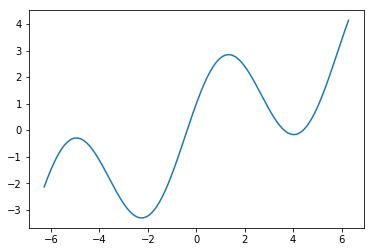

In [4]:
X = np.linspace(-2*np.pi, 2*np.pi, 500)
Y = np.cos(X) + 2*np.sin(X) + 0.5*X

plt.plot(X,Y)
plt.show()

#### Con pocos puntos

In [5]:
X = np.linspace(-2*np.pi, 2*np.pi, 5)
Y = np.cos(X) + 2*np.sin(X) + 0.5*X

In [6]:
%timeit interpolar1(0.5, X, Y)

10000 loops, best of 3: 49.3 µs per loop


In [7]:
%timeit interpolar2(0.5, X, Y) 

100000 loops, best of 3: 9.43 µs per loop


In [8]:
nX = np.linspace(-2*np.pi-0.1, 2*np.pi-0.1,num=500)
nY = np.cos(nX) + 2*np.sin(nX) + 0.5*nX
mY = np.array([interpolar1(x, X, Y) for x in nX if x not in X])
lY = np.array([interpolar2(x, X, Y) for x in nX if x not in X])

print("Error Lagrange:",np.sum(np.abs((nY-mY)/nY)))
print("Error Newton:", np.sum(np.abs((nY-lY)/nY)))
print("Error L/N", np.sum(np.abs((nY-mY)/nY)) / np.sum(np.abs((nY-lY)/nY)))

Error Lagrange: 1265.5044067
Error Newton: 1265.5044067
Error L/N 1.0


#### Con muchos puntos

In [9]:
X = np.linspace(-2*np.pi, 2*np.pi, 50)
Y = np.cos(X) + 2*np.sin(X) + 0.5*X

In [10]:
%timeit interpolar1(.5, X, Y)

The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 337 µs per loop


In [11]:
%timeit interpolar2(.5, X, Y) 

1000 loops, best of 3: 513 µs per loop


In [12]:
nX = np.linspace(-2*np.pi-0.1, 2*np.pi-0.1,num=500)
nY = np.cos(nX) + 2*np.sin(nX) + 0.5*nX
mY = np.array([interpolar1(x, X, Y) for x in nX if x not in X]) 
lY = np.array([interpolar2(x, X, Y) for x in nX if x not in X]) 

print("Error Lagrange:",np.sum(np.abs((nY-mY)/nY)))
print("Error Newton:", np.sum(np.abs((nY-lY)/nY)))
print("Error L/N", np.sum(np.abs((nY-mY)/nY)) / np.sum(np.abs((nY-lY)/nY)))

Error Lagrange: 0.0139270066805
Error Newton: 0.000109228685918
Error L/N 127.5031972


### Usando los puntos del ejercicio

In [13]:
X = np.array([-1.000, -.600, -.467, -.200, -.067])
Y = np.array([  .038,  .100,  .155,  .500,  .900])

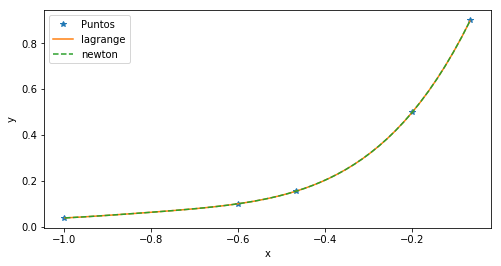

In [14]:
nX = np.linspace(-.999,-.068)

mY = np.array([interpolar1(x, X, Y) for x in nX if x not in X]) 
lY = np.array([interpolar2(x, X, Y) for x in nX if x not in X]) 
plt.figure(figsize=(8, 4))
plt.plot(X,Y, "*", nX, mY, "-", nX, lY, "--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Puntos",  "lagrange", "newton"])
plt.savefig('interpolacion1.png', bbox_inches='tight')
plt.show()

## Ejercicio 2

Escriba una función Python que implementa el método de la secante, dada lafunción f, puntos iniciales $x_0$ y $x_1$ y una tolerancia

In [15]:
def secMethod(f, x0, x1, epsilon):
    x2 = x1
    iterations = 0
    while abs(f(x2)) > epsilon and iterations < 1E6:
        # Metodo de la secante
        f0 = f(x0)
        f1 = f(x1)
        x2 = x1 - (f1*(x1 - x0))/(f1 - f0)
        
        # Contamos las iteraciones para no entrar en un bucle infinito
        iterations += 1
        
        # Actualizamos los valores
        x0, x1 = x1, x2
    return x2

In [16]:
xs = secMethod(lambda x: x**3 + 2, 0, 3, 1E-10)
xs**3 + 2

-1.687538997430238e-14

## Ejercicio 3
Use las anteriores para aproximar $f^{-1}(0.3)$

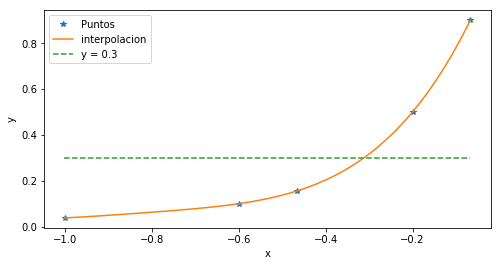

In [17]:
f = interpolate.BarycentricInterpolator(X, Y)

nX = np.linspace(-1.001,-0.06701,num=100)
nY = f(nX)

mY = np.ones(nX.shape) * 0.3

plt.figure(figsize=(8, 4))
plt.plot(X,Y, "*", nX,nY, "-", nX, mY, "--")
plt.legend(["Puntos", "interpolacion", "y = 0.3"])
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('intercepcion.png', bbox_inches='tight')
plt.show()

In [18]:
g = lambda x:  interpolar2(x, X, Y) - 0.3
#g = lambda x: f(x) - 0.3
secMethod(g, -0.468, -0.19, 1E-10)

-0.31190496815431695

## Ejercicio 4
Otra forma de hacerlo es considerar $x$ una función de $y$, usando interpolación inversa. Use sus funciones con esta idea para aproximar $f^{-1}(0.3)$

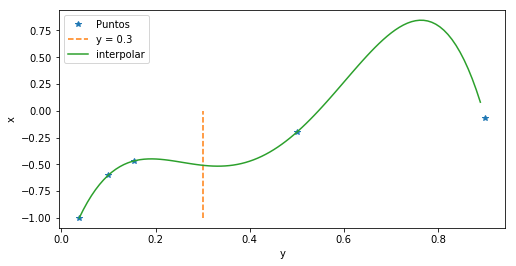

In [19]:
invf_baricentric = interpolate.BarycentricInterpolator(Y, X)
invf_interp1d = interpolate.interp1d(Y, X)
invf = interpolar2

#Interpolarcion
nY = np.linspace(0.0381,0.89,num=100)
# Interpolation 1d
nX = np.array([invf_interp1d(y) for y in nY if y not in Y]) 
# Interpolation baricentric
lX = np.array([invf_baricentric(y) for y in nY if y not in Y]) 
# Interpolation 
pX = np.array([invf(y, Y, X) for y in nY if y not in Y]) 
#pX = np.array([Eval(coef(Y, X), Y, y) for y in nY if y not in Y]) 


#Vertical Line
mX = np.linspace(-1,0,num=100)
mY = np.ones(mX.shape) * 0.3


plt.figure(figsize=(8, 4))
#plt.plot(Y,X, "*",mY, mX, "--",nY, nX, "-", nY, lX, nY, pX)
plt.plot(Y,X, "*",mY, mX, "--", nY, pX)
#plt.legend(["Puntos", "y = 0.3", "interp1d", "BarycentricInterpolator", "interpolar"])
plt.xlabel("y")
plt.ylabel("x")
plt.legend(["Puntos", "y = 0.3", "interpolar"])
plt.savefig('interpolacioninversa.png', bbox_inches='tight')
plt.show()

In [20]:
invf(0.3, Y,X)

-0.50864947547118666